In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "05-Matplotlib_Homework_Instructions_Pyber_data_city_data.csv"
ride_data_to_load = "05-Matplotlib_Homework_Instructions_Pyber_data_ride_data.csv"

# Read the City and Ride Data
city= pd.read_csv(city_data_to_load)
ride= pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined= pd.merge(ride, city, how="left", on= "city")

# Display the data table for preview
combined.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
#Separate by Urban, Suburban, and Rural
urban = combined.loc[(combined["type"] == "Urban")]
suburban = combined.loc[(combined["type"] == "Suburban")]
rural = combined.loc[(combined["type"] == "Rural")]

# Per city calculations of Average Fare, Total Rides, and Driver count for Urban
avg_fare_urban = urban.groupby(['city'])['fare'].mean()
total_rides_urban = urban.groupby(['city'])['ride_id'].count()
driver_count_urban = urban.groupby(['city'])['driver_count'].mean()

# Per city calculations of Average Fare, Total Rides, and Driver count for Suburban
avg_fare_suburban = suburban.groupby(['city'])['fare'].mean()
total_rides_suburban = suburban.groupby(['city'])['ride_id'].count()
driver_count_suburban = suburban.groupby(['city'])['driver_count'].mean()

# Per city calculations of Average Fare, Total Rides, and Driver count for Rural
avg_fare_rural = rural.groupby(['city'])['fare'].mean()
total_rides_rural = rural.groupby(['city'])['ride_id'].count()
driver_count_rural = rural.groupby(['city'])['driver_count'].mean()

## Bubble Plot of Ride Sharing Data

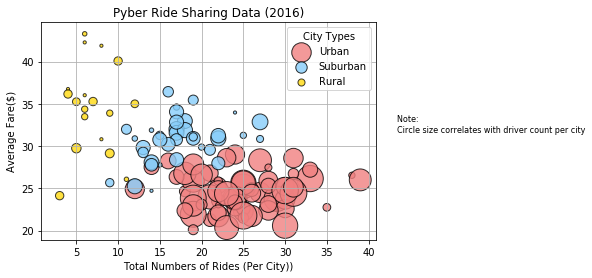

In [3]:
# Obtain the x and y coordinates for each of the three city types
#x and y coordinates have already been obtained
# Build the scatter plots for each city types
plt.scatter(total_rides_urban, avg_fare_urban,s=driver_count_urban*10,marker ='o',
            facecolors ="lightcoral", edgecolors='black',alpha = 0.8, label="Urban")

plt.scatter(total_rides_suburban, avg_fare_suburban,s=driver_count_suburban*10,marker ='o',
            facecolors ="lightskyblue", edgecolors='black',alpha = 0.8, label="Suburban")

plt.scatter(total_rides_rural, avg_fare_rural,s=driver_count_rural*10,marker ='o',
            facecolors ="gold", edgecolors='black',alpha = 0.75, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
# Create a legend
plt.legend(title= "City Types", loc='upper right')
plt.grid()
# Incorporate a text label regarding circle size
plt.figtext(.95, .5, "Note: \nCircle size correlates with driver count per city", fontsize=8)
# Save Figure
plt.savefig("Pyber Ride Sharing.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

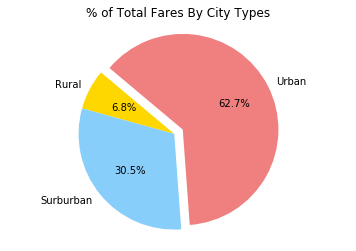

In [5]:
# Calculate Type Percents

# Build Pie Chart
total_fare = combined.groupby(['type'])['fare'].sum()
labels = ["Rural","Surburban","Urban"]
colors= ["gold","lightskyblue","lightcoral"]
explode= (0,0,0.1)
plt.pie(total_fare, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", 
        shadow=False, startangle=140)
plt.title("% of Total Fares By City Types")
plt.axis("equal")
# Save Figure
plt.savefig("Total Fares By City Types.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

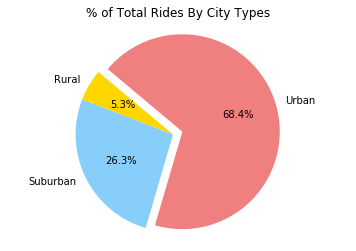

In [7]:
# Calculate Ride Percents
total_rides = combined.groupby(['type'])['ride_id'].count()
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors= ["gold","lightskyblue","lightcoral"]
explode= (0,0,0.1)
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", 
        shadow=False, startangle=140)
plt.title("% of Total Rides By City Types")
plt.axis("equal")
# Save Figure
plt.savefig("Total Rides By City Types.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

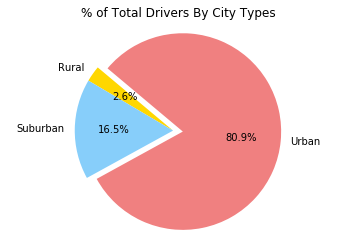

In [9]:
# Calculate Driver Percents
total_drivers = city.groupby(['type'])['driver_count'].sum()
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
colors= ["gold","lightskyblue","lightcoral"]
explode= (0,0,0.1)
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", 
        shadow=False, startangle=140)
plt.title("% of Total Drivers By City Types")
plt.axis("equal")
# Save Figure
plt.savefig("Total Drivers By City Types.png")

In [10]:
# Show Figure
plt.show()